In [ ]:
import numpy as np
import pandas as pd
import itertools as it
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from Orange.classification import tree

In [8]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')
#Data.isnull().any()
#Data = Data.fillna(method='ffill')
df1 = Data.dropna(axis=0,how='any')
Y = df1['Class']
X = df1.drop('Class', axis = 1)
df1.groupby('Class').size()

Class
-1    1111
 0    2001
 1     963
dtype: int64

In [33]:
Hpyer_Parameters = [[1,2,3,4,5,6,7,8,9],[4,5,6]]
set_parameters = [i for i in it.product(*Hpyer_Parameters)]

Epsilon = 0.2 #error real
delta = 0.1  #error de entrenamiento

h_aprox = len(set_parameters) #hipotesis para una regresión lineal
n =   # Poner aqui la dimVC

SyntaxError: invalid syntax (<ipython-input-33-bc0b4a63aaca>, line 8)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


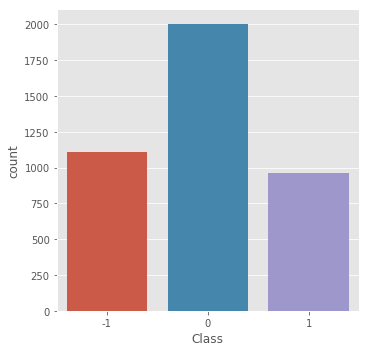

In [9]:
sb.factorplot('Class',data=df1,kind="count")

In [13]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df1))
depth_range = range(1, max_attributes + 1)


In [26]:
 tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3})

In [17]:
# Crear arrays de entrenamiento y las etiquetas que Class es
y_train = df1['Class']
x_train = df1.drop(['Class'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={1: 3.5}, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(df1.drop(['Class'], axis=1)),
                              class_names = ["-1","0","1"],
                              rounded = True,
                              filled= True )
        


In [28]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

44.22


### $\eta$ minimo estimado

In [111]:
def m_opt_tree(k,delta,Epsilon,features):
    return int((np.log(2)/(2*Epsilon**2))*(((2**k)-1)*(1+np.log2(features))+1+np.log(1/delta)))


In [117]:
k=6
n_est=m_opt_tree(k,delta,Epsilon,67)
n_est

3885

In [119]:
# Crear arrays de entrenamiento y las etiquetas que Class es
targets = df1['Class']
predictors = df1.drop(['Class'], axis=1).values 
targets.shape

(4075,)

In [120]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, train_size = n_est/X.shape[0], random_state=123, test_size=.4)

ValueError: The sum of test_size and train_size = 1.353374, should be smaller than 1.0. Reduce test_size and/or train_size.

In [80]:
pred_train.shape


(1926, 67)

In [81]:
pred_test.shape


(1630, 67)

In [82]:
tar_train.shape

(1926,)

In [83]:
tar_test.shape

(1630,)

In [113]:
#Construimos el árbol con los datos de entrenamiento
profundidad=k
Hojas=10
classifier = DecisionTreeClassifier(random_state=0, max_depth = profundidad, max_leaf_nodes = Hojas)
classifier=classifier.fit(pred_train,tar_train)

#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

In [114]:
#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
import sklearn.metrics
mat=sklearn.metrics.confusion_matrix(tar_test,predictions)
sumadiag=0
for x in range(0,3):
    sumadiag=sumadiag+mat[x][x]
    #if (x!=1):
    #    sumadiag=sumadiag+mat[x][2-x]
        
print ("La suma de las diagonales es: " +str(sumadiag))
print (mat)

La suma de las diagonales es: 813
[[111 354   8]
 [ 69 692  12]
 [ 79 295  10]]


In [87]:
#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
sklearn.metrics.accuracy_score(tar_test, predictions)

0.46809815950920247

In [89]:
#Para dibujar el árbol hay que importar otra serie de cosas
from sklearn import tree
from io import StringIO
from IPython.display import Image

#Pintamos el árbol
out = StringIO()
tree.export_graphviz(classifier, out_file='treeMacarena.dot')

# AQUI EL ALGORITMO USANDO X1

In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [90]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
#Create Decision Tree classifer object
profundidad=5
Hojas=5
clf = DecisionTreeClassifier(random_state=0, max_depth = profundidad, max_leaf_nodes = Hojas)
# Train Decision Tree Classifer
clf = clf.fit(X1_tr,Y1_tr)

#Predict the response for test dataset
y_pred_t = clf.predict(X1_ts)


In [70]:
df1.dtypes

Class                        int64
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                     float64
volume_adi                 float64
volume_obv                 float64
volume_cmf                 float64
volume_fi                  float64
volume_em                  float64
volume_vpt                 float64
volume_nvi                 float64
volatility_bbh             float64
volatility_bbl             float64
volatility_bbm             float64
volatility_bbli            float64
volatility_kcc             float64
volatility_kch             float64
volatility_kcl             float64
volatility_dch             float64
volatility_dcl             float64
volatility_dcli            float64
trend_macd                 float64
trend_macd_signal          float64
trend_macd_diff            float64
trend_ema_fast             float64
trend_ema_slow             float64
trend_vortex_ind_pos

### $\eta$ minimo optimo

In [ ]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = n_opt/X.shape[0], random_state=123)

# AQUI EL ALGORITMO USANDO X2